In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt 
import pandas as pd 
from utils import *
from plot_utils import * 
from preprocessing import *

In [2]:
os.listdir()

['utils.py',
 'project.ipynb',
 'preprocessing.py',
 '__pycache__',
 '__main__.py',
 'README.md',
 'plot_utils.py']

# Load data

In [3]:
'''
ijcnn
'''
train_ijcnn = np.load('../data/train_ijcnn.npy')
train_y_ijcnn = np.load('../data/train_y_ijcnn.npy')
test_ijcnn = np.load('../data/train_ijcnn.npy')
test_y_ijcnn = np.load('../data/test_y_ijcnn.npy')
'''
a9a
'''
train_a9a = pd.read_csv('../data/a9a.csv')
test_a9a = pd.read_csv('../data/a9a_test.csv')
train_y_a9a = train_a9a.label.values
train_a9a = train_a9a.iloc[:,:-1].to_numpy()
test_y_a9a = test_a9a.label.values
test_a9a = test_a9a.iloc[:,:-1].to_numpy()

'''
w8a
'''
train_w8a = pd.read_csv('../data/w8a.csv')
test_w8a = pd.read_csv('../data/w8a_test.csv')
train_y_w8a = train_w8a.label.values
train_w8a = train_w8a.iloc[:,:-1].to_numpy()
test_y_w8a = test_w8a.label.values
test_w8a = test_w8a.iloc[:,:-1].to_numpy()



In [4]:
train_y_ijcnn

array([-1, -1, -1, ..., -1,  1, -1])

In [5]:
'''
Initialize weights:
'''
w0_ijcnn = np.asarray([-0.5 if j%2==0 else 0.5 for j in range(np.shape(train_ijcnn)[1])])

w0_a9a = np.asarray([-0.5 if j%2==0 else 0.5 for j in range(np.shape(train_a9a)[1])])

w0_w8a = np.asarray([-0.5 if j%2==0 else 0.5 for j in range(np.shape(train_w8a)[1])])

In [77]:
''' 
Optimal losses values:
'''

'1st loss'
min_loss_ijcnn1 = 0.18921401
min_loss_a9a1 = 0.32337858
min_loss_w8a1 = 0.1261806865

'2nd loss'
min_loss_ijcnn2 = 0.1835636
min_loss_a9a2 = 0.32337858
min_loss_w8a2 = 0.1261806865


'3rd loss'
min_loss_ijcnn3 = 0.09228018427995886
min_loss_a9a3 = 0.1737618443938501
min_loss_w8a3 = 0.15147186392920522

In [68]:
min([min(loss) for loss in losses])

0.1261806865113947

# Num. analysis

In [7]:
plt.style.use('bmh')

## SARAH, lr and m gridsearch

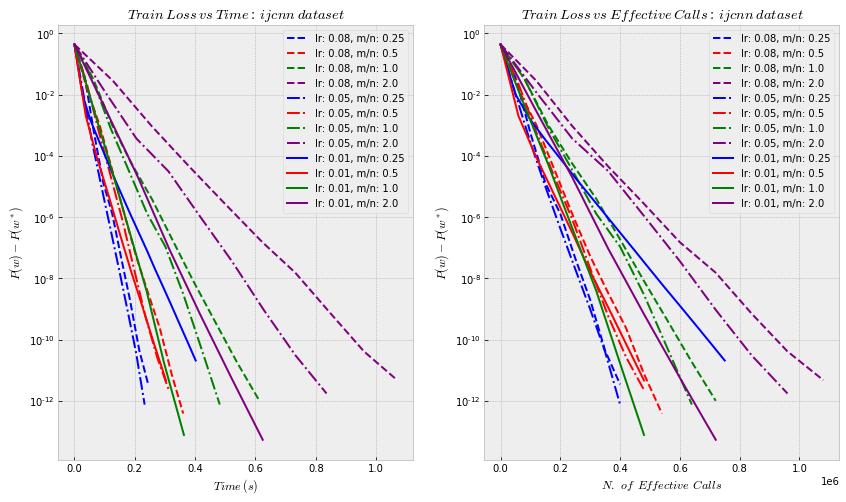

In [10]:
'ijcnn dataset, 3rd loss'

n = len(train_y_ijcnn)
# m = int(0.5*n)
emmes = [k*n for k in [0.25,0.5,1,2]]
learning_rates = [0.08,0.05,0.01]
ls_params = [[lr,m] for lr in learning_rates for m in emmes]
ls_passes = [n+params[1] for params in ls_params]
ls_algs = ['sarah']*len(ls_params)
labels = [f'lr: {param[0]}, m/n: {param[1]/n}' for param in ls_params]
linetypes = ['dashed']*len(emmes)
linetypes.extend(['dashdot']*len(emmes))
linetypes.extend(['solid']*len(emmes))

colors = ['blue','red','green','purple']*3
# colors.extend(['red']*len(emmes))
# colors.extend(['green']*len(emmes))
algs_comparison(x=train_ijcnn,y=train_y_ijcnn,w0=w0_ijcnn,dataset='ijcnn',ls_algs=ls_algs,ls_params=ls_params,
                min_loss=min_loss_ijcnn,return_losses=False,eps=1e-10,max_iter=40,wait=2,lambda_=0,ltype=3,
                ls_passes=ls_passes,save=False,path=None, 
                use_labels=True, labels = labels, linetypes=linetypes,colors=colors)

## SARAH+, gamma comparison

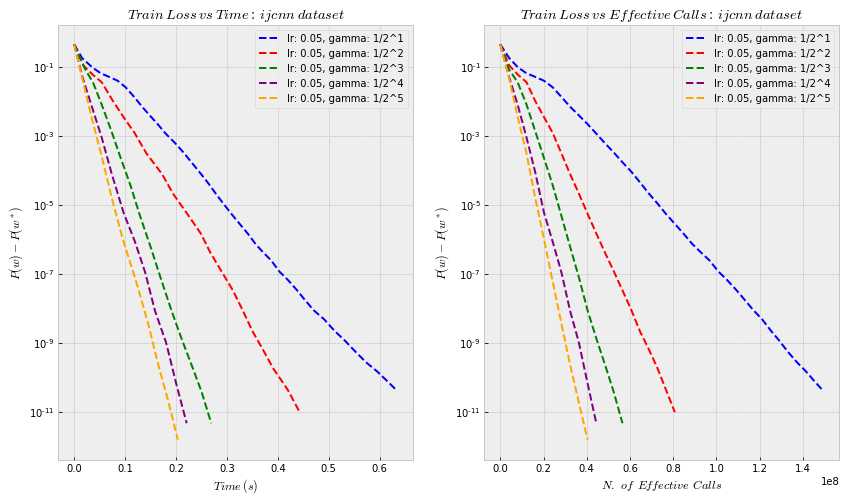

In [15]:
'ijcnn dataset, 3rd loss:'

n = len(train_y_ijcnn)
lr = 0.05 
gammas = [1/2**k for k in range(1,6)]
m = 100 * n 
ls_params = [[lr,m,gamma] for gamma in gammas]
ls_passes = [n+params[1] for params in ls_params]
ls_algs = ['sarahplus']*len(ls_params)
labels = [f'lr: {param[0]}, gamma: 1/2^{k+1}' for k,param in enumerate(ls_params)]
# linetypes = ['dashed']*len(emmes)
# linetypes.extend(['dashdot']*len(emmes))
# linetypes.extend(['solid']*len(emmes))

colors = ['blue','red','green','purple','orange']
algs_comparison(x=train_ijcnn,y=train_y_ijcnn,w0=w0_ijcnn,dataset='ijcnn',ls_algs=ls_algs,ls_params=ls_params,
                min_loss=min_loss_ijcnn,return_losses=False,eps=1e-10,max_iter=40,wait=2,lambda_=0,ltype=3,
                ls_passes=ls_passes,save=False,path=None,labels=labels,use_labels=True,colors=colors,linetypes=['dashed']*len(ls_params))

## Sarah vs Sarah+

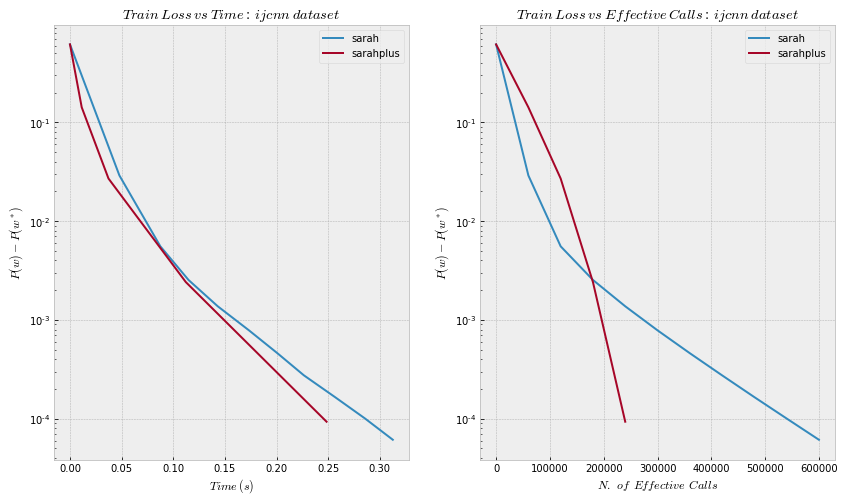

In [18]:
'1st loss: ijcnn dataset'
n = len(train_y_ijcnn)
m = int(0.5*n)
ls_params = [[0.05,m],[0.05,10*m,1/32]]
ls_passes = [n+m,n+m]
losses = algs_comparison(x=train_ijcnn,y=train_y_ijcnn,w0=w0_ijcnn,dataset='ijcnn',ls_algs=['sarah','sarahplus'],ls_params=ls_params,
                min_loss=min_loss_ijcnn1,return_losses=True,eps=1e-4,max_iter=40,wait=1,lambda_=1/len(train_y_ijcnn),ltype=1,
                ls_passes=ls_passes,save=False,path=None)

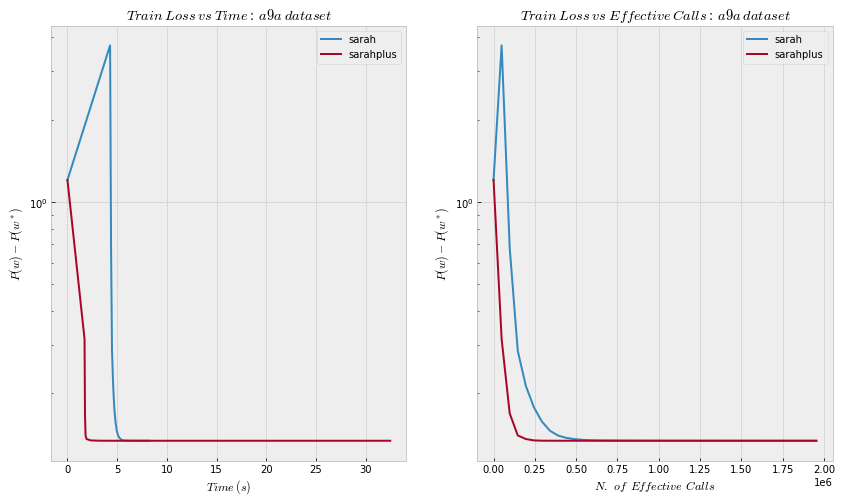

In [62]:
'1st loss: a9a dataset'
n = len(train_y_a9a)
m = int(0.5*n)
ls_params = [[0.05,m],[0.05,10*m,1/32]]
ls_passes = [n+m,n+m]
losses = algs_comparison(x=train_a9a,y=train_y_a9a,w0=w0_a9a,dataset='a9a',ls_algs=['sarah','sarahplus'],ls_params=ls_params,
                min_loss=min_loss_a9a1,return_losses=True,eps=1e-4,max_iter=40,wait=1,lambda_=1/len(train_y_a9a),ltype=1,
                ls_passes=ls_passes,save=False,path=None)

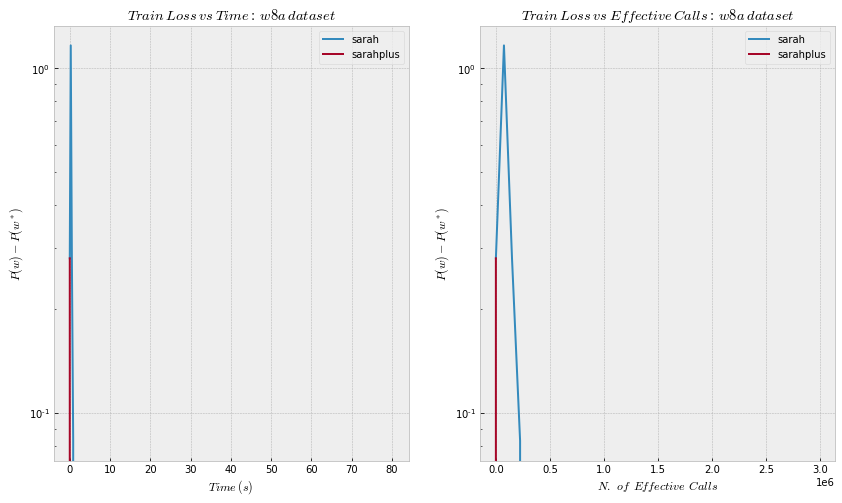

In [66]:
'1st loss: w8a dataset'
n = len(train_y_w8a)
m = int(0.5*n)
ls_params = [[0.01,m],[0.01,10*m,1/32]]
ls_passes = [n+m,n+m]
losses = algs_comparison(x=train_w8a,y=train_y_w8a,w0=w0_w8a,dataset='w8a',ls_algs=['sarah','sarahplus'],ls_params=ls_params,
                min_loss=min_loss_a9a1,return_losses=True,eps=1e-4,max_iter=40,wait=1,lambda_=1/len(train_y_w8a),ltype=1,
                ls_passes=ls_passes,save=False,path=None)

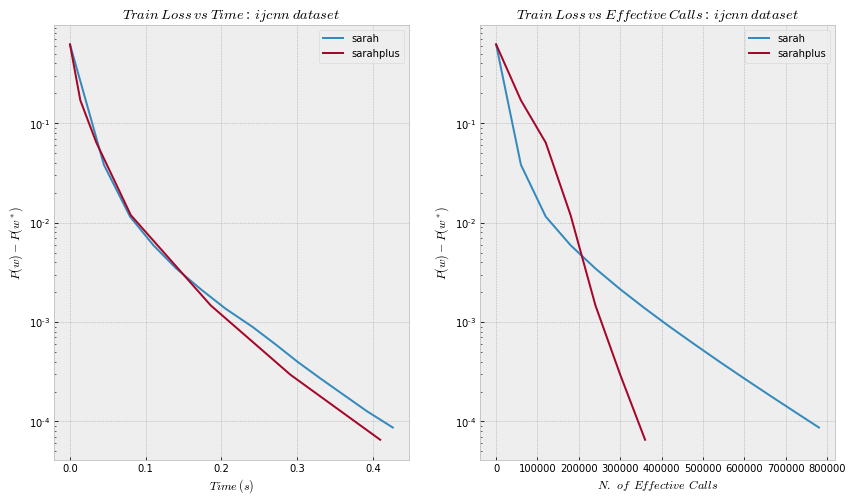

In [26]:
'2nd loss: ijcnn dataset'

n = len(train_y_ijcnn)
m = int(0.5*n)
ls_params = [[0.05,m],[0.05,4*m,1/16]]
ls_passes = [n+m,n+m]
losses = algs_comparison(x=train_ijcnn,y=train_y_ijcnn,w0=w0_ijcnn,dataset='ijcnn',ls_algs=['sarah','sarahplus'],ls_params=ls_params,
                min_loss=min_loss_ijcnn2,return_losses=True,eps=1e-4,max_iter=40,wait=1,lambda_=1/len(train_y_ijcnn),ltype=2,
                ls_passes=ls_passes,save=False,path=None)

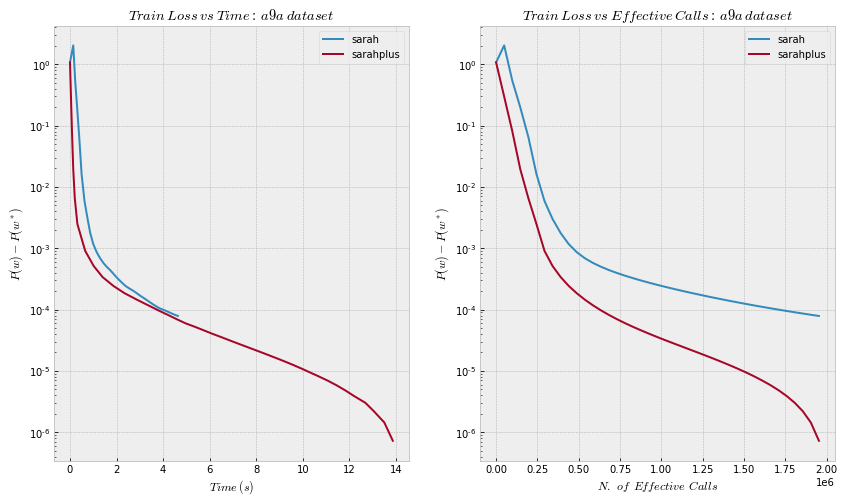

In [74]:
'2nd loss: a9a dataset'

n = len(train_y_a9a)
m = int(0.5*n)
ls_params = [[0.03,m],[0.03,4*m,1/16]]
ls_passes = [n+m,n+m]
losses = algs_comparison(x=train_a9a,y=train_y_a9a,w0=w0_a9a,dataset='a9a',ls_algs=['sarah','sarahplus'],ls_params=ls_params,
                min_loss=min_loss_a9a1,return_losses=True,eps=1e-8,max_iter=40,wait=5,lambda_=1/len(train_y_a9a),ltype=2,
                ls_passes=ls_passes,save=False,path=None)

In [ ]:
'2nd loss: w8a dataset'

n = len(train_y_a9a)
m = int(0.5*n)
ls_params = [[0.05,m],[0.05,4*m,1/16]]
ls_passes = [n+m,n+m]
losses = algs_comparison(x=train_a9a,y=train_y_a9a,w0=w0_a9a,dataset='a9a',ls_algs=['sarah','sarahplus'],ls_params=ls_params,
                min_loss=min_loss_a9a1,return_losses=True,eps=1e-4,max_iter=40,wait=1,lambda_=1/len(train_y_a9a),ltype=2,
                ls_passes=ls_passes,save=False,path=None)

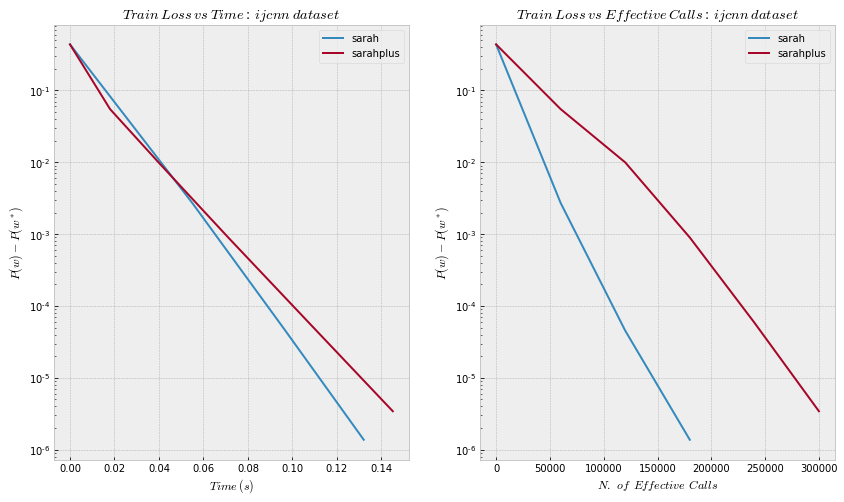

In [29]:
'3rd loss: ijcnn dataset'
n = len(train_y_ijcnn)
m = int(0.5*n)
ls_params = [[0.01,m],[0.01,100*m,1/16]]
ls_passes = [n+m,n+m]
algs_comparison(x=train_ijcnn,y=train_y_ijcnn,w0=w0_ijcnn,dataset='ijcnn',ls_algs=['sarah','sarahplus'],ls_params=ls_params,
                min_loss=min_loss_ijcnn3,return_losses=False,eps=1e-4,max_iter=40,wait=2,lambda_=0,ltype=3,
                ls_passes=ls_passes,save=False,path=None)

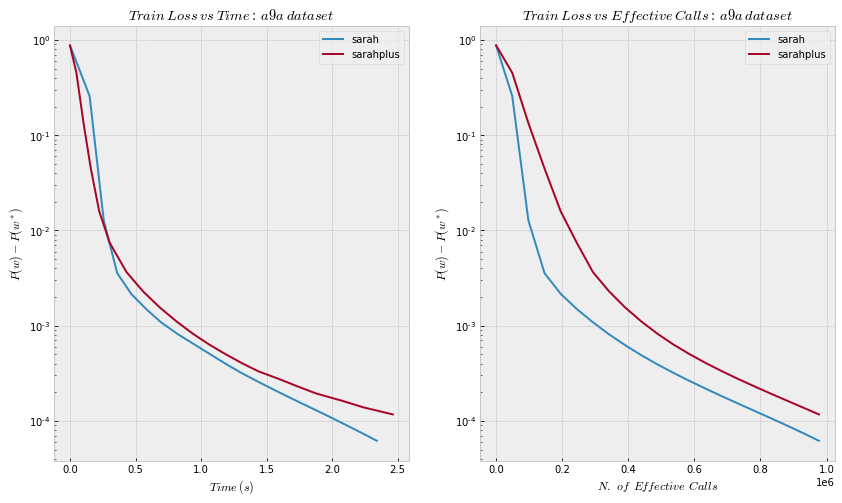

In [43]:
'3rd loss: a9a dataset'
n = len(train_y_a9a)
m = int(0.5*n)
ls_params = [[0.01,m],[0.01,m,1/8]]
ls_passes = [n+m,n+m]
losses = algs_comparison(x=train_a9a,y=train_y_a9a,w0=w0_a9a,dataset='a9a',ls_algs=['sarah','sarahplus'],ls_params=ls_params,
                min_loss=0.1737,return_losses=True,eps=1e-8,max_iter=20,wait=10,lambda_=0,ltype=3,
                ls_passes=ls_passes,save=False,path=None)

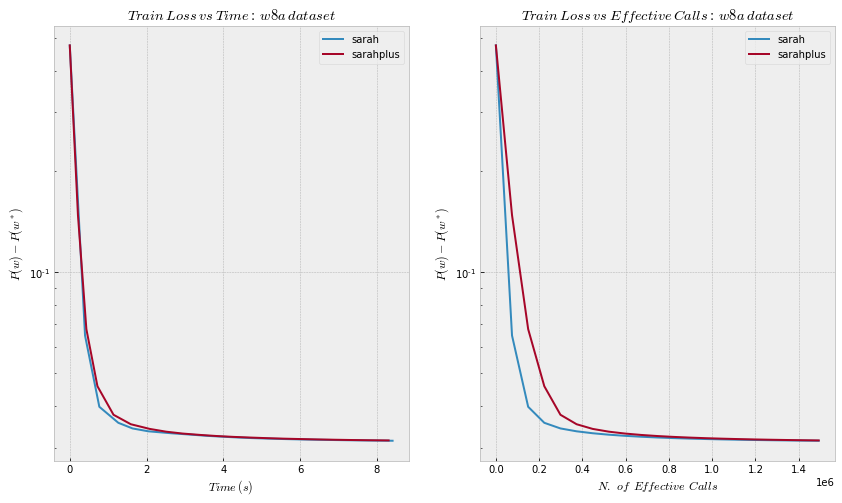

In [49]:
'3rd loss: w8a dataset'
n = len(train_y_w8a)
m = int(0.5*n)
ls_params = [[0.01,m],[0.01,m,1/8]]
ls_passes = [n+m,n+m]
losses = algs_comparison(x=train_w8a,y=train_y_w8a,w0=w0_w8a,dataset='w8a',ls_algs=['sarah','sarahplus'],ls_params=ls_params,
                min_loss=min_loss_w8a3,return_losses=True,eps=1e-8,max_iter=20,wait=10,lambda_=0,ltype=3,
                ls_passes=ls_passes,save=False,path=None)

## Spider vs SpiderBoost vs SpiderBoost-M


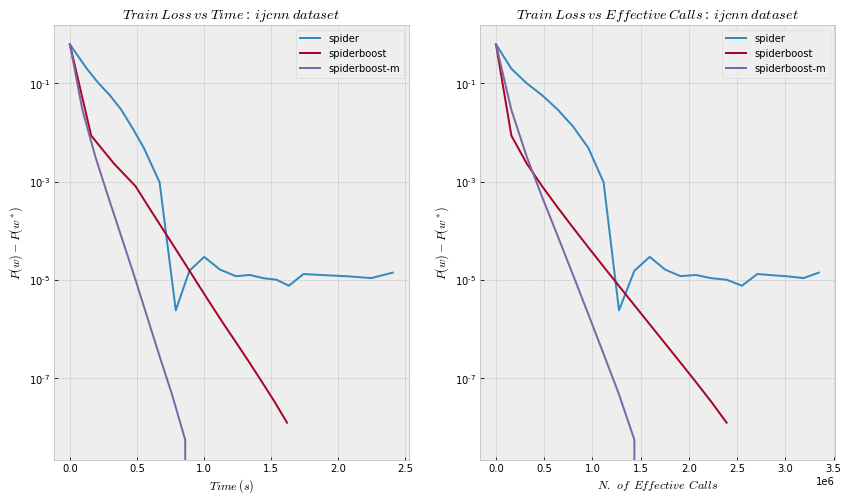

In [83]:
'1st loss: ijcnn dataset'

n = len(train_y_ijcnn)
m = int(0.5*n)
S = 256
q = int(n/S)
K = int(2*q)
eps_tilde = 1e-6
ls_params = [[0.01,K,q,S,eps_tilde],[6,K,q,S],[6,K,q,S]]
ls_passes = [K/q*n + (K-2)*S,K/q*n + (K-2)*S,K/q*n + (K-2)*S]
algs_comparison(x=train_ijcnn,y=train_y_ijcnn,w0=w0_ijcnn,dataset='ijcnn',ls_algs=['spider','spiderboost','spiderboost-m'],ls_params=ls_params,
                min_loss=min_loss_ijcnn1,return_losses=False,eps=1e-6,max_iter=40,wait=5,lambda_=1/len(train_y_ijcnn),ltype=1,
                ls_passes=ls_passes,save=False,path=None)

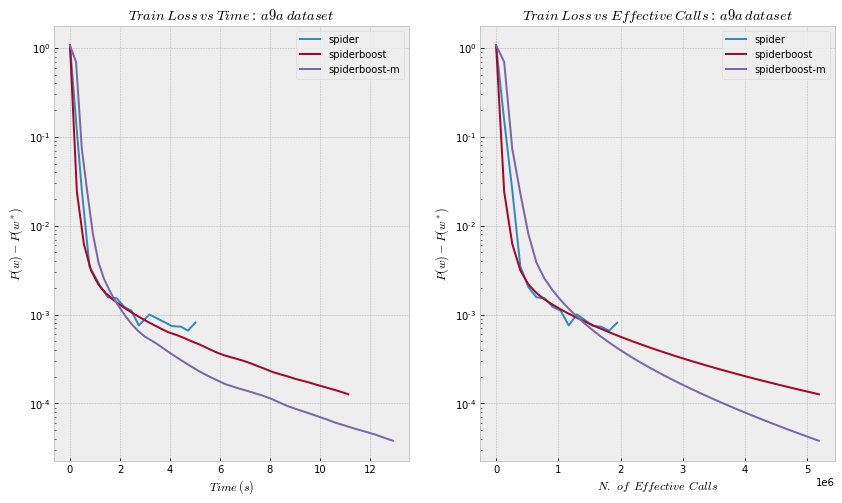

In [87]:
'1st loss: a9a dataset'

n = len(train_y_a9a)
m = int(0.5*n)
S = 256
q = int(n/S)
K = int(2*q)
eps_tilde = 1e-6
ls_params = [[0.01,K,q,S,eps_tilde],[1,K,q,S],[1,K,q,S]]
ls_passes = [K/q*n + (K-2)*S,K/q*n + (K-2)*S,K/q*n + (K-2)*S]
algs_comparison(x=train_a9a,y=train_y_a9a,w0=w0_a9a,dataset='a9a',ls_algs=['spider','spiderboost','spiderboost-m'],ls_params=ls_params,
                min_loss=min_loss_a9a1,return_losses=False,eps=1e-6,max_iter=40,wait=5,lambda_=1/len(train_y_a9a),ltype=1,
                ls_passes=ls_passes,save=False,path=None)

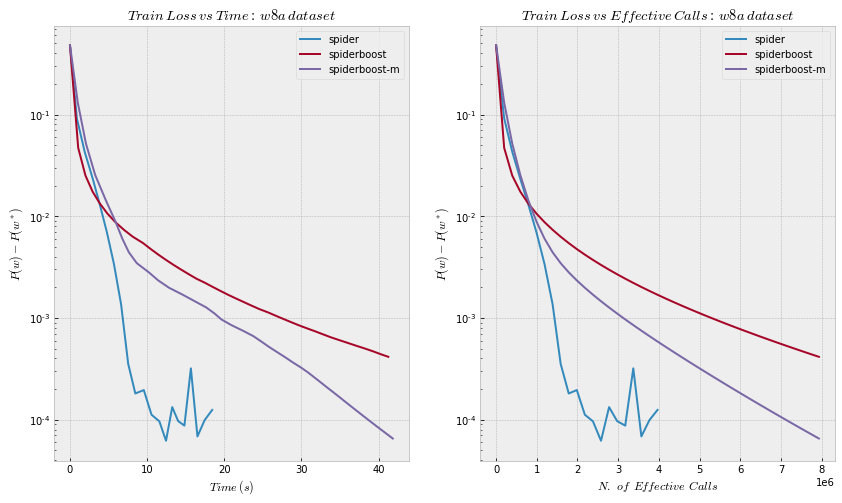

In [89]:
'1st loss: w8a dataset'

n = len(train_y_w8a)
m = int(0.5*n)
S = 256
q = int(n/S)
K = int(2*q)
eps_tilde = 1e-6
ls_params = [[0.01,K,q,S,eps_tilde],[2,K,q,S],[2,K,q,S]]
ls_passes = [K/q*n + (K-2)*S,K/q*n + (K-2)*S,K/q*n + (K-2)*S]
algs_comparison(x=train_w8a,y=train_y_w8a,w0=w0_w8a,dataset='w8a',ls_algs=['spider','spiderboost','spiderboost-m'],ls_params=ls_params,
                min_loss=min_loss_w8a1,return_losses=False,eps=1e-6,max_iter=40,wait=5,lambda_=1/len(train_y_w8a),ltype=1,
                ls_passes=ls_passes,save=False,path=None)

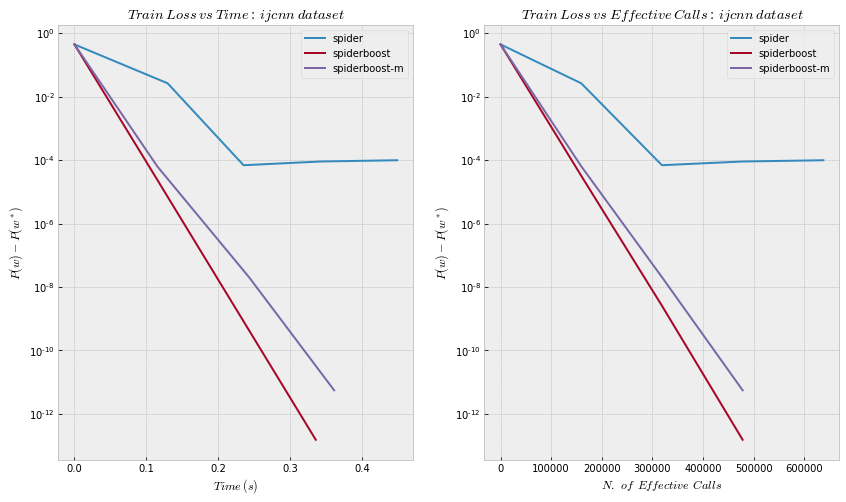

In [91]:

'3rd loss: ijcnn dataset'

n = len(train_y_ijcnn)
m = int(0.5*n)
S = 256
q = int(n/S)
K = int(2*q)
eps_tilde = 1e-6
ls_params = [[0.01,K,q,S,eps_tilde],[2,K,q,S],[2,K,q,S]]
ls_passes = [K/q*n + (K-2)*S,K/q*n + (K-2)*S,K/q*n + (K-2)*S]
algs_comparison(x=train_ijcnn,y=train_y_ijcnn,w0=w0_ijcnn,dataset='ijcnn',ls_algs=['spider','spiderboost','spiderboost-m'],ls_params=ls_params,
                min_loss=min_loss_ijcnn3,return_losses=False,eps=1e-6,max_iter=40,wait=2,lambda_=0,ltype=3,
                ls_passes=ls_passes,save=False,path=None)

## Comparing all the algorithms

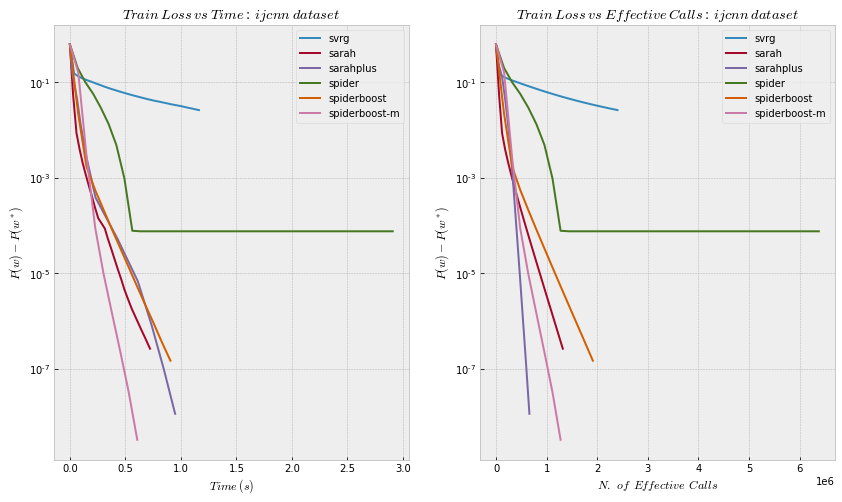

In [96]:
'''
1st loss: ijcnn
'''
x = train_ijcnn
y = train_y_ijcnn
w0 = w0_ijcnn
n = len(y)
lambda_ = 1/len(y)

lr = 0.05
m = int(0.5*n)
gamma = 1/8
S = 256
q = n/256
K = 2*q 
eps_tilde = 1e-4
ls_params = [[0.001,m],
             [lr,m],
             [lr,100*m,gamma],
             [0.01,K,q,S,eps_tilde],
             [6,K,q,S], 
             [6,K,q,S]]
ls_passes = [n+m,n+m,n+m,K/q*(n) + (K-2)*S,K/q*(n) + (K-2)*S,K/q*(n) + (K-2)*S]
losses = algs_comparison(x=x,y=y,w0=w0,dataset='ijcnn',eps=1e-6,ls_algs=['svrg','sarah','sarahplus','spider','spiderboost','spiderboost-m'],ls_params=ls_params,
                lambda_=lambda_,ltype=1,ls_passes=ls_passes,min_loss = min_loss_ijcnn1,save=False,path=None,
                max_iter = 40, wait = 3)

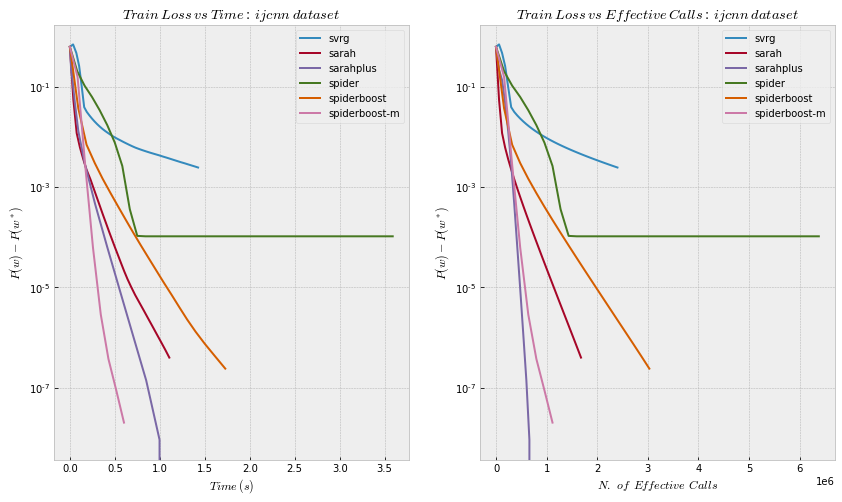

In [100]:
'''
2nd loss: ijcnn
'''
x = train_ijcnn
y = train_y_ijcnn
w0 = w0_ijcnn
n = len(y)
lambda_ = 1/len(y)

lr = 0.05
m = int(0.5*n)
gamma = 1/8
S = 256
q = n/256
K = 2*q 
eps_tilde = 1e-4
ls_params = [[0.005,m],
             [lr,m],
             [lr,100*m,gamma],
             [0.01,K,q,S,eps_tilde],
             [5,K,q,S], 
             [5,K,q,S]]
ls_passes = [n+m,n+m,n+m,K/q*(n) + (K-2)*S,K/q*(n) + (K-2)*S,K/q*(n) + (K-2)*S]
losses = algs_comparison(x=x,y=y,w0=w0,dataset='ijcnn',eps=1e-6,ls_algs=['svrg','sarah','sarahplus','spider','spiderboost','spiderboost-m'],ls_params=ls_params,
                lambda_=lambda_,ltype=2,ls_passes=ls_passes,min_loss = min_loss_ijcnn2,save=False,path=None,
                max_iter = 40, wait = 3)

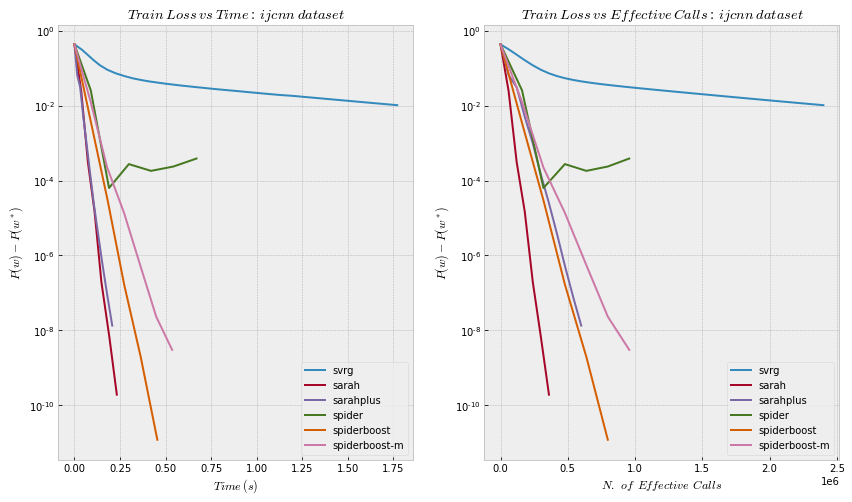

In [106]:
'''
3rd loss: ijcnn
'''
x = train_ijcnn
y = train_y_ijcnn
w0 = w0_ijcnn
n = len(y)
lambda_ = 1/len(y)

lr = 0.05
m = int(0.5*n)
gamma = 1/8
S = 256
q = n/256
K = 2*q 
eps_tilde = 1e-4
ls_params = [[0.0001,m],
             [lr,m],
             [lr,100*m,gamma],
             [0.01,K,q,S,eps_tilde],
             [3,K,q,S], 
             [3,K,q,S]]
ls_passes = [n+m,n+m,n+m,K/q*(n) + (K-2)*S,K/q*(n) + (K-2)*S,K/q*(n) + (K-2)*S]
losses = algs_comparison(x=x,y=y,w0=w0,dataset='ijcnn',eps=1e-6,ls_algs=['svrg','sarah','sarahplus','spider','spiderboost','spiderboost-m'],ls_params=ls_params,
                lambda_=lambda_,ltype=3,ls_passes=ls_passes,min_loss = min_loss_ijcnn3,save=False,path=None,
                max_iter = 40, wait = 3)
                